
Mario Ayavire.

In [1]:
#Librerías de Python

import numpy as np #Programación vectorial
import pandas as pd #Estructura y manipulación de datos
import matplotlib.pyplot as plt #Visualización

import seaborn as sb #Gráficos

import warnings #Advertencias
warnings.filterwarnings('ignore')

In [2]:
# Importación del dataset
df = pd.read_excel("clientes_Preprocesado.xlsx")

In [5]:
df

,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC,Gasto_Mensual
0,0,0,2,8,1,3,5,1000000,530661
1,0,0,13,6,1,3,1,1000000,904428
2,1,1,18,11,1,3,0,1000000,704975
3,0,0,5,4,0,3,4,1000000,767575
4,0,0,5,4,1,3,4,1000000,995146
...,...,...,...,...,...,...,...,...,...
197852,0,0,14,9,1,4,0,2000000,2292900
197853,1,1,18,11,1,4,1,2000000,1802600
197854,0,0,18,11,2,4,2,2000000,2023700
197855,0,0,18,11,2,4,1,2000000,2731300


* Columna: Seguro
Valor Codificado - Clase
0 - Accidente
1 - Automotriz
4 - Salud
2 - Desgravamen
6 - Vida
3 - Robo
5 - Viaje
------------------------
* Columna: Genero
Valor Codificado - Clase
0 - Femenino
1 - Masculino
------------------------
* Columna: Ciudad
Valor Codificado - Clase
2 - Buin
13 - Puerto Montt
18 - Valparaíso
5 - Concepción
11 - Osorno
4 - Chillán
1 - Arica
10 - Los Ángeles
6 - Copiapó
14 - Rancagua
0 - Antofagasta
8 - La Serena
7 - Iquique
9 - Linares
15 - Santiago
12 - Ovalle
17 - Temuco
16 - Talca
19 - Villarrica
3 - Calama
------------------------
* Columna: Region
Valor Codificado - Clase
8 - Metropolitana
6 - Los Lagos
11 - Valparaíso
4 - Biobío
12 - Ñuble
2 - Arica y Parinacota
3 - Atacama
9 - O'Higgins
0 - Antofagasta
5 - Coquimbo
10 - Tarapacá
7 - Maule
1 - Araucanía
------------------------
* Columna: Estado_Civil
Valor Codificado - Clase
1 - Soltero(a)
0 - Casado(a)
2 - Viudo(a)
------------------------
* Columna: Educacion
Valor Codificado - Clase
3 - Técnico
2 - Media
4 - Universitario
1 - Magister
0 - Doctorado
------------------------

##DEFINICIÓN DE VARIABLES

La correlación indica cuán asociadas se encuentran dos variables entre sí. Esta medida tiene un rango entre 1 y -1, donde:

1 = las variables se relacionan de forma directa.

0 = las variables no se relacionan.

-1 = las variables se relacionan inversamente.

Entre más cercano a cero sea la correlación, más débil es la relación entre las variables, en cambio entre más cercano a 1 (sea positivo o negativo), más fuerte es la relación.

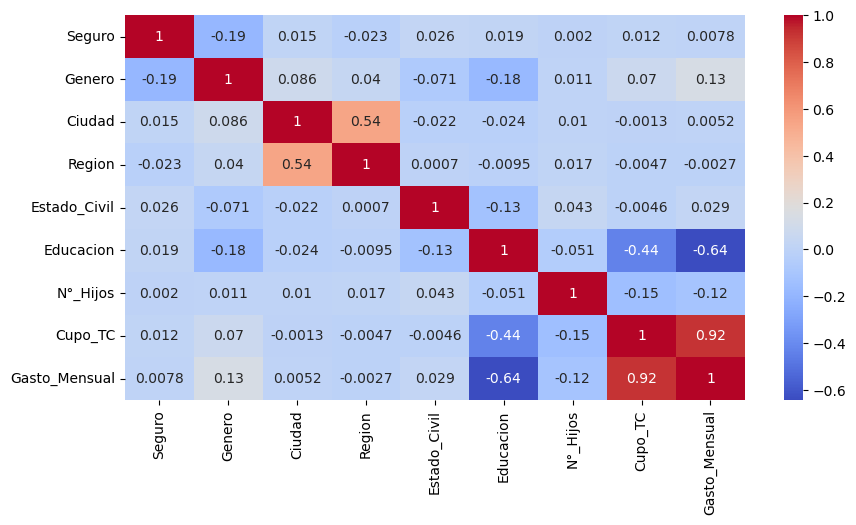

In [10]:
corr = df.corr()
plt.figure(figsize=(10,5))
sb.heatmap(corr, cmap="coolwarm",annot=True)
plt.show()

Definimos como variable Y a Gasto_Mensual porque es la variable que buscamos predecir

In [13]:
#Variable dependiente
Y = pd.DataFrame(df['Gasto_Mensual'])
Y.head()

,Gasto_Mensual
0,530661
1,904428
2,704975
3,767575
4,995146


Luego definimos las variables X usando el siguiente codigo y en vez de seleccionar las que dejaremos, seleccionaremos las que no elijiremos, quedando el resto como variables X

In [17]:
#Variables independientes
X = df.drop(columns=['Gasto_Mensual'])
X.head()

,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC
0,0,0,2,8,1,3,5,1000000
1,0,0,13,6,1,3,1,1000000
2,1,1,18,11,1,3,0,1000000
3,0,0,5,4,0,3,4,1000000
4,0,0,5,4,1,3,4,1000000


➡️ `Split`: Se realiza una separación (split) del set de datos en *conjunto de entrenamiento* y *conjunto de prueba*. Con esta partición el set de datos quedará dividido en 4 secciones: *Xtrain, Xtest, Ytrain, Ytest*.

> *   Conjunto de Entrenamiento (train): Porción de los datos que se utilizará para el entrenamiento del modelo. La sección de la variable $X$ de este conjunto queda almacenada en Xtrain y la variable $Y$ en Ytrain.
> *   Conjunto de Prueba/Validación (test): Porción de los datos que se utilizará en el modelo para realizar predicciones y validar los resultados. La sección de la variable $X$ de este conjunto queda almacenada en Xtest y la variable $Y$ en Ytest.

Realizar esta división del set de datos ayuda a corregir errores de sobreajuste (overfitting) y subajuste (underfitting) que pueda tener el modelo.

Parámetros (sci-kit learn):

> ●   `arrays`: Conjuntos de datos a dividir. Puedes proporcionar uno o varios arrays, dependiendo de cuántos conjuntos de datos se quieran dividir. Por lo general, se proporcionan los datos de características (X) y las etiquetas o valores objetivo (Y) como arrays separados.

> ●   `test_size/train_size`: Permiten especificar el tamaño del conjunto de prueba (test) o del conjunto de entrenamiento (train), respectivamente. Uno de ellos debe estar presente, y el otro se calculará automáticamente. Se pueden especificar como un número decimal que representa la proporción del conjunto de datos total o como un número entero que representa el número absoluto de muestras en el conjunto de prueba o entrenamiento.

> ●   `shuffle`: Indica si se deben barajar (mezclar) los datos antes de la división. Por defecto, está configurado en True, lo que significa que los datos se barajan antes de la división. Si se configura en False, los datos se dividirán en el mismo orden en que se encuentran en los arrays de entrada (no recomendado).

> ●   `stratify`: Se utiliza cuando se realiza una división estratificada, lo que significa que la división se realiza de manera que las proporciones de clases en el conjunto de entrenamiento y prueba sean similares a las proporciones en el conjunto de datos original. Se debe proporcionar un array con etiquetas de clase para utilizar este parámetro.

> ●   `random_state`: Semilla aleatoria para garantizar la reproducibilidad de los resultados.

In [20]:
from sklearn.model_selection import train_test_split

La proporción en que se divide el set de datos se define en el argumento `test_size`, donde se indica el tamaño del conjunto de prueba.

In [23]:
#Se define una proporcion 80/20, es decir un tamaño del conjunto de prueba de 0.2 (20%)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=123)

In [25]:
#Conjunto de entrenamiento
print(Xtrain.shape)
print(Ytrain.shape)

(158285, 8)
(158285, 1)


In [27]:
#Conjunto de prueba
print(Xtest.shape)
print(Ytest.shape)

(39572, 8)
(39572, 1)


##**MODELOS DE REGRESIÓN**

Se busca predecir una variable objetivo (target) correspondiente a una variable dependiente (Y) de tipo numérica.

###**1. Regresión Lineal**

➡️ `LinearRegression()`:  Es un algoritmo de aprendizaje automático que se utiliza para crear modelos de regresión lineal. La regresión lineal es un método estadístico que se utiliza para modelar la relación lineal entre una variable dependiente y una o más variables independientes. El objetivo es encontrar la mejor línea recta (en el caso de la regresión lineal simple) o un hiperplano (en el caso de la regresión lineal múltiple) que minimice la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo.

Parámetros (sci-kit learn):

> ●   `fit_intercept`:  Un valor booleano que indica si se debe ajustar el término de intercepción en el modelo (es decir, la ordenada al origen). Si se establece en True el modelo incluirá un término de intercepción en el ajuste. Si se establece en False, el modelo no incluirá una intercepción. Por defecto, está en True.

####**Modelo 1**

✅ Paso 1 - Modelo: Creación del modelo de Regresión Lineal

In [35]:
from sklearn.linear_model import LinearRegression

In [37]:
modelo_1 = LinearRegression()

✅ Paso 2 - Entrenamiento: Entrenamiento del modelo ajustándolo con $X$ e $Y$.

In [40]:
modelo_1.fit(Xtrain, Ytrain)

LinearRegression()

✅ Paso 3 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos 
 (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

➡️ `out-of-sample`: Predicción con datos que no han sido utilizados durante el entrenamiento del modelo. Esto se hace para evaluar cómo se desempeña el modelo con datos desconocidos, como lo son los datos del conjunto de prueba (Xtest), los cuales utilizamos para validar el modelo.

In [44]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_1.predict(Xtest)

In [46]:
# Tabla comparativa
Ytest = Ytest.rename(columns={'Gasto_Mensual': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Ytest, Y_hat, left_index=True, right_index=True)
Comparacion["Diferencia"] = Comparacion["Observación (Y)"]-Comparacion["Estimación (Ŷ)"]
Comparacion.head(10)

,Observación (Y),Estimación (Ŷ),Diferencia
23411,4329950,8.552928e+05,3.474657e+06
2904,597150,8.963481e+05,-2.991981e+05
1596,442454,9.101829e+05,-4.677289e+05
36539,3668090,1.908445e+06,1.759645e+06
3976,480556,9.156274e+05,-4.350714e+05
33342,461174,8.285669e+05,-3.673929e+05
34647,799584,9.171577e+05,-1.175737e+05
12304,6175740,9.358628e+05,5.239877e+06
25959,934191,5.193925e+05,4.147985e+05
34747,773079,9.085989e+05,-1.355199e+05


✅ Paso 4 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

➡️ Métricas de error: Indican la diferencia entre el valor observado de la variable objetivo $Y$, y el valor estimado de ésta, $\hat Y$.

> ●   `Error Absoluto Medio (MAE)`: Es la medida del promedio de la diferencia absoluta entre el valor real de $Y$ y su valor estimado, $\hat Y$. Al usar valores absolutos evita la cancelación de errores negativos con positivos. Permite interpretar los resultados en las mismas unidades que la variable $Y$.

> ●   `Error Cuadrático Medio (MSE)`: Mide el cuadrado de la diferencia absoluta entre el valor real de $Y$ y su valor estimado,$\hat Y$, lo cual penaliza los errores mayores. Esta medida es muy susceptible a datos atípicos (outliers), ya que entre mayores sean estos, más grande se hará la medida del error.

> ●   `Raíz del Error Cuadrático Medio (RMSE)`: Es la raíz de la media de los errores elevados al cuadrado. Permite interpretar los resultados en las mismas unidades que la variable $Y$. Es la métrica más utilizada.

➡️ Métricas de desempeño: Miden el grado de precisión con el cual el modelo hace las estimaciones, $\hat Y$.

> `Coeficiente de determinación (r2)`: Examina cómo las diferencias en una variable $Y$ pueden ser explicadas por la diferencia en otra variable $X$. Evalúa la fuerza de la relación lineal entre dos variables. Esta relación, conocida como "bondad de ajuste", se representa como un valor entre 0 y 1. Entre más cercano a 1, mejor es el ajuste del modelo. Un valor de 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para predicciones futuras, mientras que un valor de 0 indicaría que el modelo no tienen ninguna precisión.

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse

In [54]:
MAE_1 = mean_absolute_error(Ytest, Y_hat)
MSE_1 =  mean_squared_error(Ytest, Y_hat)
RMSE_1 = rmse(Ytest, Y_hat)
r2_1 = r2_score(Ytest, Y_hat)

print("MAE: %.2f" % MAE_1)
print("MSE: %.2f" % MSE_1)
print("RMSE: %.2f" % RMSE_1)
print('r2: %.2f' % r2_1)

MAE: 276922.61
MSE: 215111407933.40
RMSE: 463801.04
r2: 0.92


El modelo de Regresión Lineal presenta un grado de error bastante bueno y un grado de ajuste efectivo de 92% que lo convierte en un modelo fiable. En cuanto al RMSE tenemos una diferencia de 186.878,43 pesos más alto que MAE lo que indica que este factor podria mejorar en otros modelos.

###**2. Árbol de Decisión**

✅ Paso 1 - Modelo: Creación del modelo de Árbol de Regresión.

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
modelo_2 = DecisionTreeRegressor(random_state=123)

✅ Paso 2 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [68]:
modelo_2.fit(Xtrain, Ytrain)

DecisionTreeRegressor(random_state=123)

✅ Paso 3 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [71]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_2.predict(Xtest)

In [73]:
from sklearn import tree

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [76]:
import math

In [84]:
MAE_2 = mean_absolute_error(Ytest, Y_hat)
MSE_2 =  mean_squared_error(Ytest, Y_hat)
RMSE_2 = math.sqrt(mean_squared_error(Ytest, Y_hat))
r2_2 = r2_score(Ytest, Y_hat)

print("MAE: %.2f" % MAE_2)
print("MSE: %.2f" % MSE_2)
print("RMSE: %.2f" % RMSE_2)
print('r2: %.2f' % r2_2)

MAE: 129697.94
MSE: 55966869340.47
RMSE: 236573.18
r2: 0.98


En este modelo podemos darnos cuenta que nuestro r2 es aun mejor que en el modelo de regresion linean y nuestra diferencia entre el RMSE Y EL MAE es de 129.460,521 pesos lo que es una diferencia menor a la que nos dio en la regresion lineal, podriamos considerar este modelo como mejor y seguiremos en busqueda de otros resultados en otros modelos.

####**Modelo 3**

✅ Paso 1 - Modelo: Creación del modelo de Árbol de Regresión.

In [88]:
modelo_3 = DecisionTreeRegressor(max_depth=12, min_samples_split=3, min_samples_leaf=3)

✅ Paso 2 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [91]:
modelo_3.fit(Xtrain, Ytrain)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=3)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [94]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_3.predict(Xtest)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [98]:
MAE_3 = mean_absolute_error(Ytest, Y_hat)
MSE_3 =  mean_squared_error(Ytest, Y_hat)
RMSE_3 = math.sqrt(mean_squared_error(Ytest, Y_hat))
r2_3 = r2_score(Ytest, Y_hat)
print("MAE: %.2f" % MAE_3)
print("MSE: %.2f" % MSE_3)
print("RMSE: %.2f" % RMSE_3)
print('r2: %.2f' % r2_3)

MAE: 150142.04
MSE: 62636840524.38
RMSE: 250273.53
r2: 0.98


En este caso mantenemos el r2 de 98% de ajuste pero la diferencia entre el RMSE y el MAE es de 100.131,49 pesos lo que es mejor al modelo 2 por lo tanto podriamos considerar a este modelo como el mejor hasta ahora.

###**3. K-Nearest Neighbors (KNN)**

####**Modelo 4**

✅ Paso 1 - Modelo: Creación del modelo KNN.

In [105]:
from sklearn.neighbors import KNeighborsRegressor

In [107]:
modelo_4 = KNeighborsRegressor(n_neighbors=5)

✅ Paso 2 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [110]:
modelo_4.fit(Xtrain, Ytrain)

KNeighborsRegressor()

✅ Paso 3 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [113]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_4.predict(Xtest)

✅ Paso 4 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [115]:
MAE_4 = mean_absolute_error(Ytest, Y_hat)
MSE_4 =  mean_squared_error(Ytest, Y_hat)
RMSE_4 = rmse(Ytest, Y_hat)
r2_4 = r2_score(Ytest, Y_hat)

print("MAE: %.2f" % MAE_4)
print("MSE: %.2f" % MSE_4)
print("RMSE: %.2f" % RMSE_4)
print('r2: %.2f' % r2_4)

MAE: 140087.16
MSE: 66480654665.29
RMSE: 257838.43
r2: 0.98


para el modelo KNN tenemos un r2 de 98% de ajuste y una diferencia de 117.751,27 pesos entre el RMSE Y EL MAE manteniendo al modelo 3 como mejor modelo hasta ahora.

####**Modelo 5**

Probar manualmente ajustando hiperparámetros hasta encontrar los valores óptimos puede tomar mucho tiempo, por lo que es mejor utilizar un algoritmo que ayude a encontrar la mejor combinación de éstos. En este caso utilizaremos el algoritmo de GridSearchCV.

In [120]:
from sklearn.model_selection import GridSearchCV

In [122]:
# Definir la lista de hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 12],  # Valores de K
    'metric': ['euclidean', 'manhattan']  # Métricas de distancia
}

# Crear el modelo KNN Regressor
modelo = KNeighborsRegressor()

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(Xtrain, Ytrain)  # X_train y y_train son tus datos de entrenamiento

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 7}

✅ Paso 1 - Modelo: Creación del modelo KNN.

In [129]:
# Crear un nuevo modelo KNN Regressor con los mejores parámetros
best_k = best_params['n_neighbors']  # Mejor valor de K
best_metric = best_params['metric']  # Mejor métrica de distancia

modelo_5 = KNeighborsRegressor(n_neighbors=best_k, metric=best_metric, weights='distance')

✅ Paso 2 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [132]:
modelo_5.fit(Xtrain, Ytrain)


KNeighborsRegressor(metric='manhattan', n_neighbors=7, weights='distance')

✅ Paso 3 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

In [136]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_5.predict(Xtest)

✅ Paso 4 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [138]:
MAE_5 = mean_absolute_error(Ytest, Y_hat)
MSE_5 =  mean_squared_error(Ytest, Y_hat)
RMSE_5 = rmse(Ytest, Y_hat)
r2_5 = r2_score(Ytest, Y_hat)

print("MAE: %.2f" % MAE_5)
print("MSE: %.2f" % MSE_5)
print("RMSE: %.2f" % RMSE_5)
print('r2: %.2f' % r2_5)

MAE: 136048.39
MSE: 63269411714.72
RMSE: 251534.12
r2: 0.98


Para este quinto modelo logramos tener un r2 de 98% igual a los modelos anteriores y una diferencia de 115.485,73 pesos de diferencia entre el RMSE y el MAE.

En conclusion a estos 5 modelos podemos considerar al modelo 3 como el mas fiable luego de el analisis realizado.

---
---
## **DOCUMENTACIÓN**

NumPy Developers. (n.d.). User guide. NumPy. Retrieved December 1, 2024, from https://numpy.org/devdocs/user/index.html#user

Pandas Development Team. (n.d.). User guide. Pandas. Retrieved December 1, 2024, from https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib Developers. (n.d.). User's guide. Matplotlib. Retrieved December 1, 2024, from https://matplotlib.org/stable/users/index.html

Waskom, M. L., et al. (n.d.). Seaborn tutorial. Seaborn. Retrieved December 1, 2024, from https://seaborn.pydata.org/tutorial.html

Scikit-learn Developers. (n.d.). User guide. Scikit-learn. Retrieved December 1, 2024, from https://scikit-learn.org/stable/user_guide.html

Statsmodels Developers. (n.d.). User guide. Statsmodels. Retrieved December 1, 2024, from https://www.statsmodels.org/stable/user-guide.html